In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:]#所有样本的后两个特征，不是前两个
y = iris.target

### criterion is now gini instead of entropy

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 2, criterion = "gini")
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


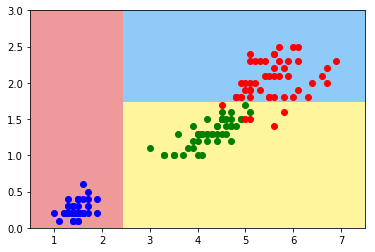

In [7]:
plot_decision_boundary(dt_clf, axis = [0.5,7.5,0,3])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.scatter(X[y == 2, 0],X[y == 2, 1],color = 'r')
plt.show()

#### 这个结果和Entropy的差别不大

### Simulate the process of using gini index to split different class

In [9]:
from collections import Counter
from math import log

def split(X, y, d, value): #d:维度，value：阈值
    index_a = (X[:,d] <= value) #这是boolean，代表了我们要选哪些indexes
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    ret = 1.0
    for label in counter.values(): #y中的label
        p_label = label / len(y) #label对应的概率
        ret -= (p_label)**2
    return ret

def try_split(X, y):
    best_gini = float('inf')
    best_d, best_value = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, X.shape[0]):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                value = ( X[sorted_index[i-1], d] + X[sorted_index[i], d] ) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, value)
                g = gini(y_l) + gini(y_r) #两部分的熵之和
                if g < best_gini:
                    best_gini, best_d, best_value = g, d, value
    return best_gini, best_d, best_value

In [10]:
best_gini, best_d, best_value = try_split(X, y)
print("best_gini:", best_gini)
print("best_d:", best_d)
print("best_value:", best_value)

best_gini: 0.5
best_d: 0
best_value: 2.45


### 观察：
1. 的确第一个划分是 x轴的划分：体现在best_d = 0,第一个轴
2. 划分阈值是2.45，的确下图是在x轴的2.45处的地方划分

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


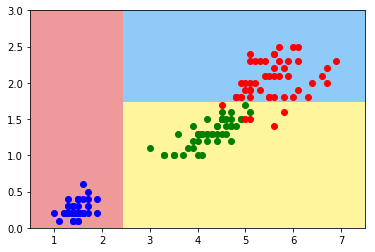

In [12]:
plot_decision_boundary(dt_clf, axis = [0.5,7.5,0,3])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.scatter(X[y == 2, 0],X[y == 2, 1],color = 'r')
plt.show()

In [11]:
X1_l, X1_r, y1_l, y1_r = split(X,y,best_d, best_value)
print("gini of y1_l: ", gini(y1_l))
print("gini of y1_r: ", gini(y1_r))

gini of y1_l:  0.0
gini of y1_r:  0.5


### 观察：
1. 粉红处的地方(y1_l)，的确全部划分正确，所以gini为0
1. 右侧地方(y1_r)，还可以继续划分，因为gini>0

In [13]:
best_gini2, best_d2, best_value2 = try_split(X1_r, y1_r)
print("best_gini:", best_gini2)
print("best_d:", best_d2)
print("best_value:", best_value2)

best_gini: 0.2105714900645938
best_d: 1
best_value: 1.75


In [16]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r,best_d2, best_value2)
print("gini of y1_l: ", gini(y2_l))
print("gini of y1_r: ", gini(y2_r))

gini of y1_l:  0.1680384087791495
gini of y1_r:  0.04253308128544431
